In [1]:
%%time
dataset_name = "W19_only"
df_list = []

%matplotlib inline 
%run f2f_header.py {dataset_name} {df_list}
# (var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    
# get full set of inferred "cross wave" auth-lib/left-right values and ages
# pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
# # pan_dataset_allr_values = pan_dataset_allr_values.loc[BES_Panel.index].sort_index()
# pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
# pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')
# del BES_Panel

Toggle code

Wall time: 38.3 s


In [2]:
BES_df_list = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_df_list.pickle", "rb" ) )
f2f_harmonised = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised.zip", compression='zip')
BES_label_list = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_label_list.pickle", "rb" ) )
demo_var_dict = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\demo_var_dict.pickle", "rb" ) )
var_type_dict_nonans = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\var_type_dict_nonans.pickle", "rb" ) )

In [15]:
{k:v for k,v in BES_label_list["2010"].items() if "vote" in v}

{'aq11_2': 'decided how to vote?',
 'aq11_3': 'decided-vote which party',
 'aq11_5': 'reason for vote',
 'aq18_6': "every citizen's duty to vote",
 'aq40': "r's vote makes diff who wins constituency",
 'aq41_1': 'vote in may 2005 general election',
 'aq41_2': "party vote 2005 win r's constituency",
 'aq42': 'vote 2007 scot parl-constituency msp',
 'aq43': 'vote 2007 scot parl-regional list',
 'aq44': 'vote 2007 welsh asmbly-constituency am',
 'aq45': 'vote 2007 welsh asmbly-regional list',
 'aq46': 'vote 2009 eu parliament',
 'aq49_1': 'feel sense of satisfaction when vote',
 'aq49_2': 'people too busy to vote',
 'aq49_3': 'most people around here usually vote',
 'aq49_4': 'if vote can really change how br gov',
 'aq49_5': 'democracy only works if people vote',
 'aq49_6': 'feel very guilty if not vote',
 'aq49_7': 'serious neglect civic duty if not vote',
 'aq56': 'votes people like r make diff win constit',
 'bq12_1': 'vote 2010 general election?',
 'bq12_2': 'party vote 2010 general 

In [8]:
BES_df_list["2010"]["aq67"].value_counts(dropna=False)

NaN                                            1577
16                                              402
19 or older                                     388
15 or younger                                   369
18                                              157
17                                              143
still at university in full-time education       21
still at school in full-time education           15
don't know                                        2
refused                                           1
Name: aq67, dtype: int64

In [9]:
BES_df_list["2010"]["bq95_1"].value_counts(dropna=False)

NaN                                           1498
16                                             446
19 or older                                    422
15 or younger                                  383
18                                             153
17                                             129
still at university in full-time education      33
still at school in full-time education          10
don't know                                       1
Name: bq95_1, dtype: int64

In [10]:
BES_df_list["2010"]["zq95_1"].value_counts(dropna=False)

16                                            848
19 or older                                   810
15 or younger                                 752
18                                            310
17                                            272
still at university in full-time education     54
still at school in full-time education         25
don't know                                      3
refused                                         1
Name: zq95_1, dtype: int64

In [13]:
BES_df_list["2010"]["zq95_1"].cat.categories

Index(['refused', 'don't know', '15 or younger', '16', '17', '18',
       '19 or older', 'still at school in full-time education',
       'still at university in full-time education'],
      dtype='object')

In [72]:
replace_dict = {'refused':np.nan, "don't know":np.nan, '15 or younger':"15-\n(N=752)", '16':"16\n(N=848)", '17':"17\n(N=272)",
                '18':"18\n(N=310)",
       '19 or older':"19+\n(N=864)", 'still at school in full-time education':np.nan,
       'still at university in full-time education':"19+\n(N=864)"}
age_left_ed = BES_df_list["2010"]["zq95_1"].replace(replace_dict)
age_left_ed.value_counts(dropna=False)

19+\n(N=864)    864
16\n(N=848)     848
15-\n(N=752)    752
18\n(N=310)     310
17\n(N=272)     272
NaN              29
Name: zq95_1, dtype: int64

In [73]:
vote = f2f_harmonised[f2f_harmonised["dataset"]=="2010"]["vote_complete"]
vote.value_counts(dropna=False)

CON     844
LAB     774
DNV     684
LD      524
SNP     114
UKIP     50
BNP      32
GP       25
PC       17
OTH      11
Name: vote_complete, dtype: int64

In [74]:
bloc = f2f_harmonised[f2f_harmonised["dataset"]=="2010"]["bloc_complete"].replace("Neither","DNV")
bloc.value_counts(dropna=False)

Left-Lib      1454
Right-Auth     926
DNV            684
NaN             11
Name: bloc_complete, dtype: int64

In [75]:
wt = f2f_harmonised[f2f_harmonised["dataset"]=="2010"]["wt"]

In [76]:
ct = pd.crosstab( age_left_ed, bloc, values = wt,aggfunc = sum, normalize='index' )*100
ct.astype(int)

bloc_complete,DNV,Left-Lib,Right-Auth
zq95_1,,,
15-\n(N=752),20,44,34
16\n(N=848),33,35,30
17\n(N=272),21,40,38
18\n(N=310),23,40,35
19+\n(N=864),16,56,27


In [77]:
ct_flat

,Age Left Education,Electoral Bloc,Voteshare
0,15-\n(N=752),DNV,20.912346
1,16\n(N=848),DNV,33.234704
2,17\n(N=272),DNV,21.940581
3,18(N=310)\n,DNV,23.870565
4,19+(N=864)\n,DNV,16.721963
5,15-\n(N=752),Left-Lib,44.875988
6,16\n(N=848),Left-Lib,35.871511
7,17\n(N=272),Left-Lib,40.008414
8,18(N=310)\n,Left-Lib,40.644294
9,19+(N=864)\n,Left-Lib,56.120603


In [78]:
ct_flat = ct.reset_index().melt(id_vars = ["zq95_1"])
ct_flat.columns = ["Age Left Education","Electoral Bloc","Voteshare"]
# sns.barplot(ct_flat)
ct_flat

,Age Left Education,Electoral Bloc,Voteshare
0,15-\n(N=752),DNV,20.912346
1,16\n(N=848),DNV,33.234704
2,17\n(N=272),DNV,21.940581
3,18\n(N=310),DNV,23.870565
4,19+\n(N=864),DNV,16.721963
5,15-\n(N=752),Left-Lib,44.875988
6,16\n(N=848),Left-Lib,35.871511
7,17\n(N=272),Left-Lib,40.008414
8,18\n(N=310),Left-Lib,40.644294
9,19+\n(N=864),Left-Lib,56.120603


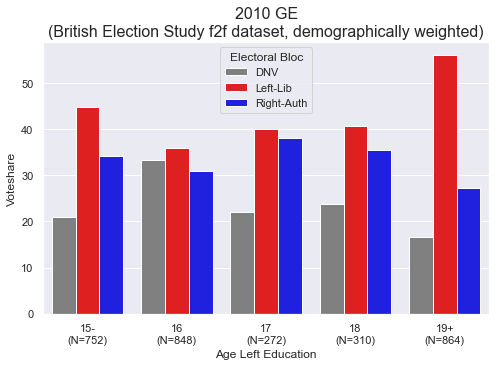

In [82]:
plt.figure(figsize=(8,5))
sns.barplot(data=ct_flat,x='Age Left Education',y='Voteshare',hue='Electoral Bloc',palette = ['grey','red','blue'])
plt.title("2010 GE\n(British Election Study f2f dataset, demographically weighted)",fontsize=16);

In [35]:
bloc.replace("Neither","DNV")

index
0       Right-Auth
1         Left-Lib
2         Left-Lib
3       Right-Auth
4       Right-Auth
           ...    
3505           DNV
3508      Left-Lib
3509      Left-Lib
3510           DNV
3511      Left-Lib
Name: bloc_complete, Length: 3075, dtype: object

In [93]:
vote
ct = pd.crosstab( age_left_ed, vote.replace({"OTH":np.nan,"PC":np.nan,"BNP":np.nan,"SNP":np.nan,"GP":np.nan}),
                 values = wt,aggfunc = sum, normalize='index' )*100
ct.astype(int)

ct_flat = ct.reset_index().melt(id_vars = ["zq95_1"])
ct_flat.columns = ["Age Left Education","Vote","Voteshare"]
# sns.barplot(ct_flat)
ct_flat

,Age Left Education,Vote,Voteshare
0,15-\n(N=752),CON,29.467126
1,16\n(N=848),CON,29.602219
2,17\n(N=272),CON,37.236398
3,18\n(N=310),CON,34.413685
4,19+\n(N=864),CON,27.044464
5,15-\n(N=752),DNV,21.822769
6,16\n(N=848),DNV,34.553239
7,17\n(N=272),DNV,22.691410
8,18\n(N=310),DNV,24.527617
9,19+\n(N=864),DNV,17.287428


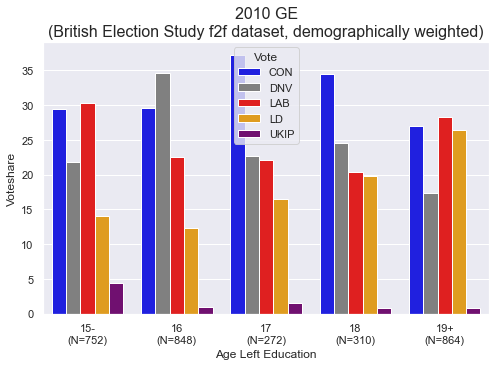

In [101]:
plt.figure(figsize=(8,5))
sns.barplot(data=ct_flat,x='Age Left Education',y='Voteshare',hue='Vote',palette = ['blue','grey','red','orange','purple'])
plt.title("2010 GE\n(British Election Study f2f dataset, demographically weighted)",fontsize=16);

In [90]:
ct.astype(int)

vote_complete,CON,DNV,GP,LAB,LD,UKIP
zq95_1,,,,,,
15-\n(N=752),29,21,0,30,13,4
16\n(N=848),29,34,0,22,12,0
17\n(N=272),37,22,0,22,16,1
18\n(N=310),34,24,0,20,19,0
19+\n(N=864),26,17,1,27,26,0
